In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [16]:
df = pd.read_csv("../data/cleaned/US_Accidents_cleaned_sample_milestone1.csv")
df.shape


(50000, 46)

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  object 
 1   Source                 50000 non-null  object 
 2   Severity               50000 non-null  int64  
 3   Start_Time             50000 non-null  object 
 4   End_Time               50000 non-null  object 
 5   Start_Lat              50000 non-null  float64
 6   Start_Lng              50000 non-null  float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           50000 non-null  float64
 10  Description            50000 non-null  object 
 11  Street                 50000 non-null  object 
 12  City                   50000 non-null  object 
 13  County                 50000 non-null  object 
 14  State                  50000 non-null  object 
 15  Zi

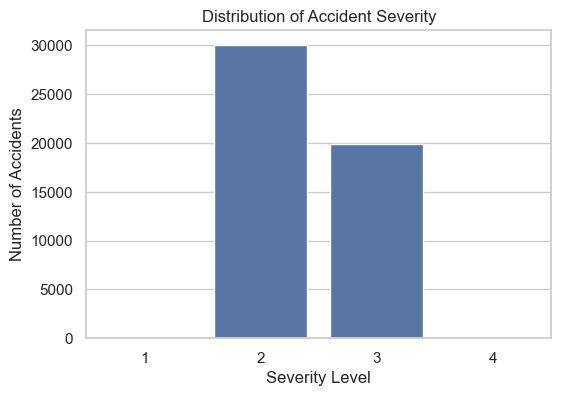

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x="Severity", data=df)
plt.title("Distribution of Accident Severity")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()


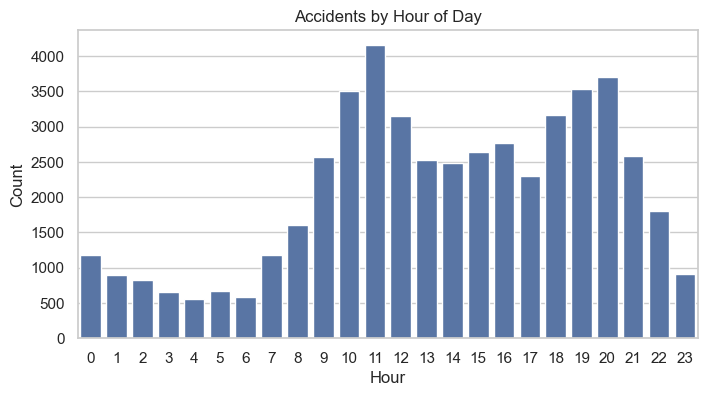

In [19]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["Hour"] = df["Start_Time"].dt.hour

plt.figure(figsize=(8,4))
sns.countplot(x="Hour", data=df)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()


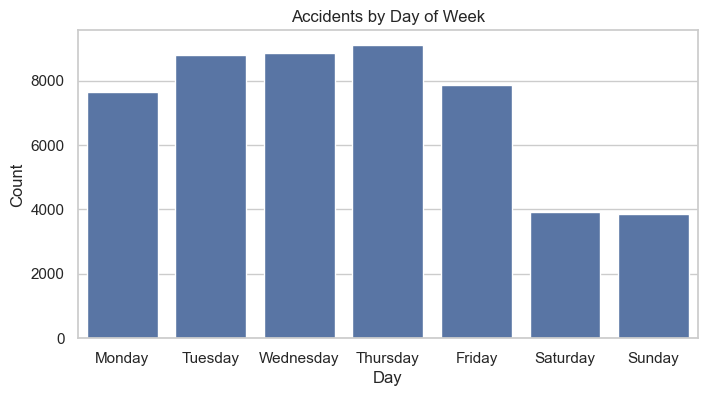

In [20]:
df["DayOfWeek"] = df["Start_Time"].dt.day_name()

plt.figure(figsize=(8,4))
sns.countplot(
    x="DayOfWeek",
    data=df,
    order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)
plt.title("Accidents by Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()


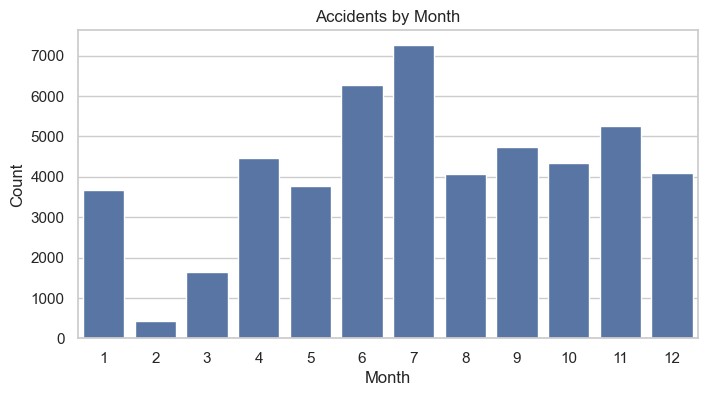

In [21]:
df["Month"] = df["Start_Time"].dt.month

plt.figure(figsize=(8,4))
sns.countplot(x="Month", data=df)
plt.title("Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


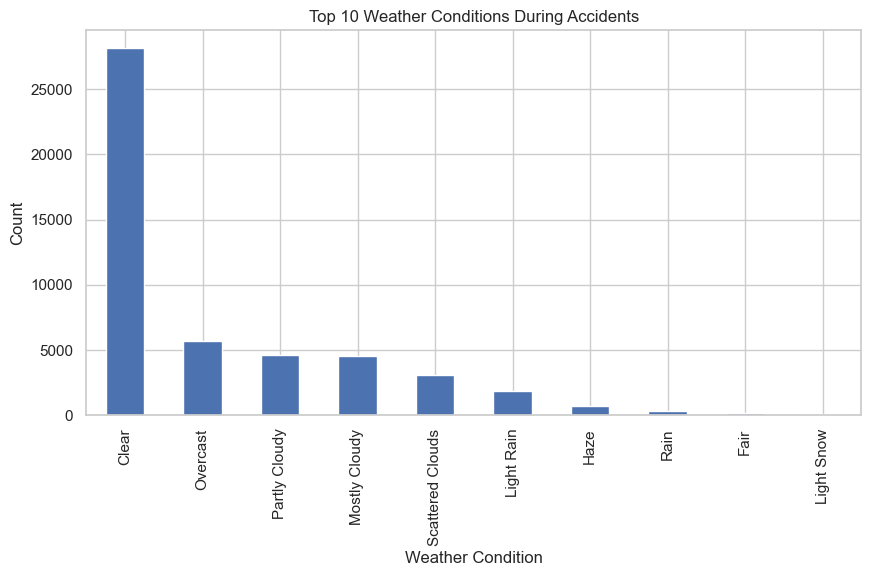

In [22]:
plt.figure(figsize=(10,5))
df["Weather_Condition"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()


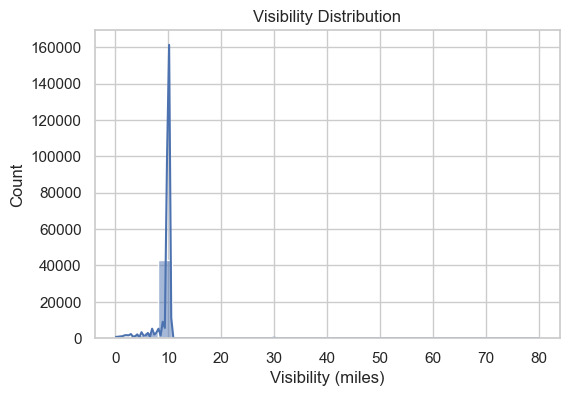

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df["Visibility(mi)"], bins=30, kde=True)
plt.title("Visibility Distribution")
plt.xlabel("Visibility (miles)")
plt.show()


In [26]:
print("WEEK 4 — BIVARIATE & MULTIVARIATE ANALYSIS")

WEEK 4 — BIVARIATE & MULTIVARIATE ANALYSIS


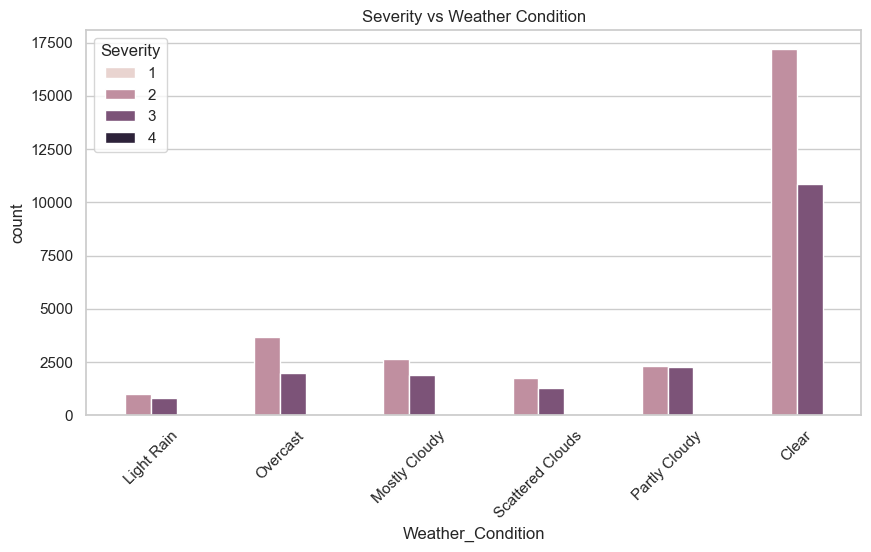

In [25]:
top_weather = df["Weather_Condition"].value_counts().head(6).index

plt.figure(figsize=(10,5))
sns.countplot(
    x="Weather_Condition",
    hue="Severity",
    data=df[df["Weather_Condition"].isin(top_weather)]
)
plt.xticks(rotation=45)
plt.title("Severity vs Weather Condition")
plt.show()


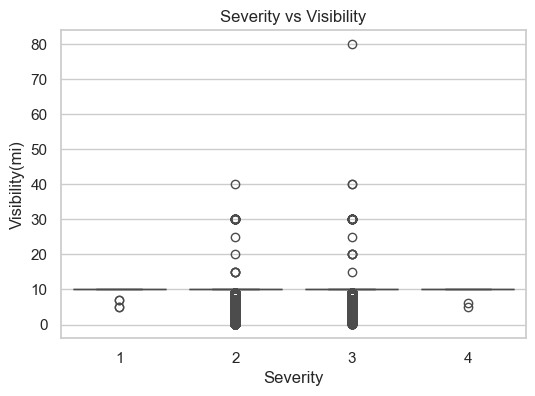

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Severity", y="Visibility(mi)", data=df)
plt.title("Severity vs Visibility")
plt.show()


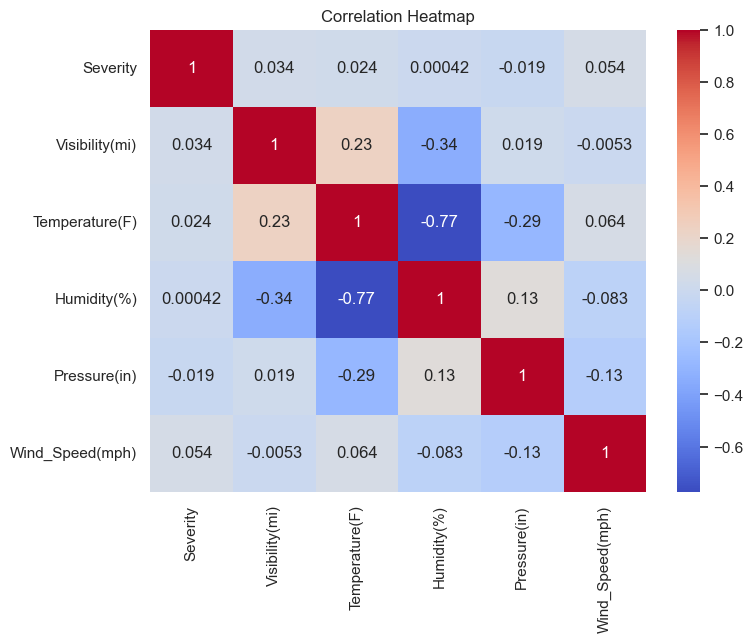

In [28]:
numeric_cols = [
    "Severity",
    "Visibility(mi)",
    "Temperature(F)",
    "Humidity(%)",
    "Pressure(in)",
    "Wind_Speed(mph)"
]

plt.figure(figsize=(8,6))
sns.heatmap(
    df[numeric_cols].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()


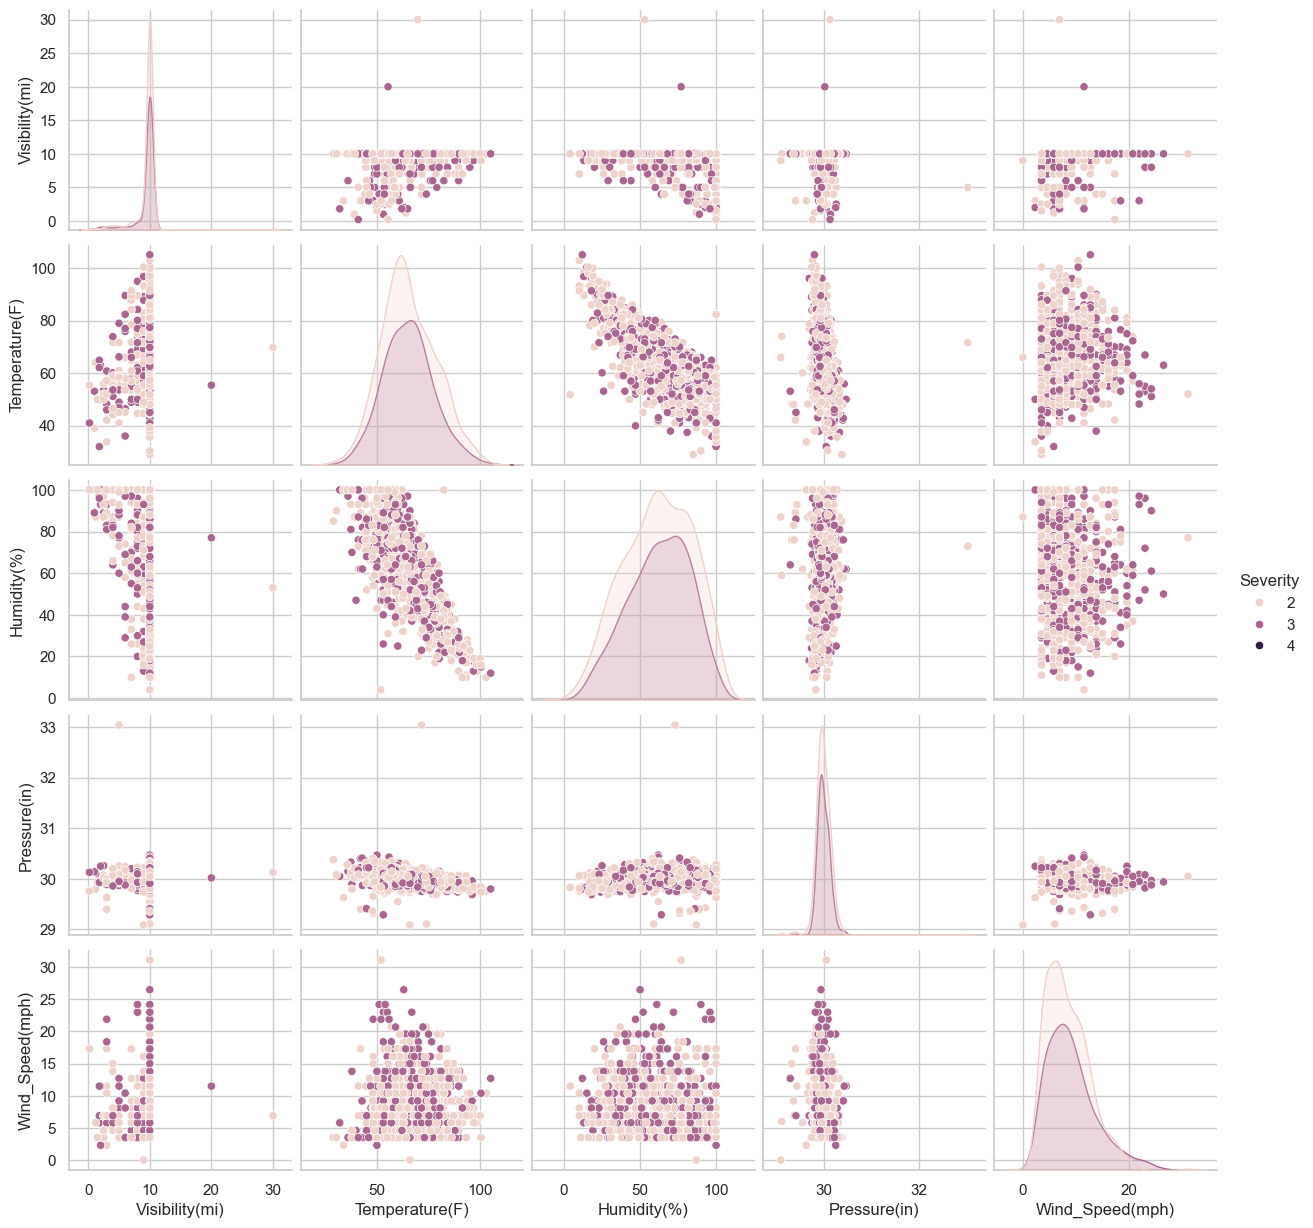

In [29]:
sns.pairplot(
    df[numeric_cols].sample(1000),
    hue="Severity"
)
plt.show()
